In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# ------------------ Configuration ------------------

# Load CSVs
predictions_baseline = pd.read_csv("Results/model_predictions.csv (252-window).csv")
predictions_chronos = pd.read_csv("Results/chronos(252-day).csv")
predictions_timesfm = pd.read_csv("Results/timesfm(252-day).csv")
predictions_uni2ts = pd.read_csv("Results/uni2ts(252-day)predictions.csv")

# Convert 'DlyCalDt' to datetime
for df in [predictions_baseline, predictions_chronos, predictions_timesfm, predictions_uni2ts]:
    df['DlyCalDt'] = pd.to_datetime(df['DlyCalDt'])

# Sort by date
for df in [predictions_baseline, predictions_chronos, predictions_timesfm, predictions_uni2ts]:
    df.sort_values(by=["DlyCalDt", "PERMNO"], inplace=True, ignore_index=True)


top_n = 10  # Top N stocks to go long
bottom_n = 10 # Bottom N stocks to go short

# Combine all predictions into a single DataFrame
exclude_columns = ['DlyCalDt', 'PERMNO', 'ExcessReturn']

baseline_cols = predictions_baseline.columns.tolist()
chronos_cols = [cols for cols in predictions_chronos.columns.tolist() if cols not in exclude_columns]
timesfm_cols = [cols for cols in predictions_timesfm.columns.tolist() if cols not in exclude_columns]
uni2ts_cols = [cols for cols in predictions_uni2ts.columns.tolist() if cols not in exclude_columns] 

# Concatenate along axis=1 (columns), aligned by index
combined_df = pd.concat([
    predictions_baseline[baseline_cols],
    predictions_chronos[chronos_cols],
    predictions_timesfm[timesfm_cols],
    predictions_uni2ts[uni2ts_cols]
], axis=1)

combined_df.rename(columns={
    'DlyCalDt': 'Date',
    'ExcessReturn': 'Actual'
}, inplace=True)

In [2]:
# Importing out_sample_df to add miscellaneous columns
out_sample_df = pd.read_csv("../Cleaned Datasets/out_sample_cleaned.csv")
out_sample_df = out_sample_df.rename(columns={'DlyCalDt': 'Date'})
out_sample_df.Date = pd.to_datetime(out_sample_df.Date)

In [3]:
# Merge out_sample_df to add Ticker and MktCap

combined_df = combined_df.merge(
    out_sample_df[['PERMNO', 'Date', 'MktCap', 'Ticker']],
    on=['PERMNO', 'Date'],
    how='left'
)

In [4]:
# combined df with market cap and ticker
combined_df

,PERMNO,Date,Actual,Ridge,OLS,ElasticNet,Lasso,GLM,RF,NN1,...,y_chr_t5_tiny,y_chr_t5_mini,y_chr_t5_small,y_tfm1,y_tfm2,y_moirai_s,y_moirai_moe_s,y_moirai_moe_b,MktCap,Ticker
0,10138,2016-01-04,-0.018191,-0.004143,-0.004143,0.000625,0.000674,-0.004177,0.000407,0.000203,...,0.003099,0.001360,0.001157,-0.002102,-0.013468,-0.002219,-0.000939,-0.002451,1.758042e+07,TROW
1,17778,2016-01-04,-0.007616,-0.002580,-0.002580,0.000221,0.000626,-0.002273,0.000407,-0.000076,...,-0.001333,-0.000048,-0.001620,-0.001228,-0.017500,0.006807,-0.001220,0.004609,1.591952e+08,BRK
2,28388,2016-01-04,-0.015413,-0.005698,-0.005698,0.000952,0.000927,-0.005601,0.000407,-0.000602,...,0.002055,0.000463,0.000587,0.000246,-0.011218,-0.005661,0.002210,-0.000521,1.855621e+07,VNO
3,34746,2016-01-04,-0.027370,-0.002167,-0.002167,0.000934,0.000713,-0.001459,0.000407,0.002295,...,0.002393,0.002728,0.002003,-0.000967,-0.019544,0.004117,0.002983,0.006002,1.534831e+07,FITB
4,35044,2016-01-04,-0.016674,-0.001958,-0.001958,0.000539,0.000568,-0.001318,0.000407,0.005719,...,0.002093,0.001914,0.000308,-0.002593,-0.020761,0.032126,0.006111,0.005684,1.232363e+07,RF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112395,86455,2024-12-31,0.000924,0.001271,0.001271,0.001255,0.000782,0.001768,0.000407,0.000248,...,0.000564,-0.001260,0.001696,0.000410,-0.005479,0.004775,0.005910,0.002849,4.819443e+07,XLF
112396,86755,2024-12-31,-0.008607,0.002545,0.002545,0.001563,0.000819,0.002505,0.000407,0.000234,...,0.002860,0.002112,0.000996,-0.000016,-0.009630,0.016519,0.001489,0.000947,3.188797e+08,QQQ
112397,86868,2024-12-31,-0.001733,0.002049,0.002049,0.001675,0.000730,0.002527,0.000407,-0.001945,...,0.002565,0.000939,0.000575,0.001895,-0.007931,0.010327,0.002633,0.003929,1.797511e+08,GS
112398,87267,2024-12-31,-0.002370,0.004601,0.004601,0.001591,0.001018,0.003958,0.000407,0.002246,...,0.000366,-0.003324,0.000023,0.001402,-0.009405,0.003279,0.001094,0.002043,1.587680e+08,BLK


In [5]:
# Calculate returns for the baseline portfolio

def sharpe_ratio(df, column_name):
    returns = df[column_name]
    cumulative = (1 + returns).cumprod()
    mean_return = returns.mean()
    vol = returns.std()
    sharpe = mean_return / vol * np.sqrt(252)  # Daily Returns, annualized Sharpe Ratio
    return cumulative, sharpe

#print(f"Sharpe Ratio for actual returns: {sharpe:.4f}")

### Sharpe Ratio for actual returns: 0.4552


In [6]:

def build_long_short_portfolio(df, column_name, n=10):
    
    long_short_returns = []
    
    for date, group in df.groupby('Date'):
        sorted_group = group.sort_values(column_name, ascending=False)
        no_of_stocks = round((n/100)*len(sorted_group))
    
        top = sorted_group.head(no_of_stocks)
        bottom = sorted_group.tail(no_of_stocks)
        
        # Normalize weights to sum to 1
        top['weight'] = top['MktCap'] / top['MktCap'].sum()
        bottom['weight'] = bottom['MktCap'] / bottom['MktCap'].sum()

        # Compute value-weighted return of long and short sides
        long_return = (top['Actual'] * top['weight']).sum()
        short_return = (bottom['Actual'] * bottom['weight']).sum()
       
        avg_return = long_return - short_return
        long_short_returns.append((date, avg_return))
    
    return pd.DataFrame(long_short_returns, columns=["Date", "Returns"])

In [ ]:
model_cols = [
    'Ridge', 'OLS', 'ElasticNet', 'Lasso', 'GLM', 'RF',
    'NN1', 'NN2', 'NN3', 'NN4', 'NN5', 'GBRT',
    'y_chr_bolt_tiny', 'y_chr_bolt_mini', 'y_chr_bolt_small', 'y_chr_bolt_base',
    'y_chr_t5_tiny', 'y_chr_t5_mini', 'y_chr_t5_small',
    'y_tfm1', 'y_tfm2',
    'y_moirai_s', 'y_moirai_moe_s', 'y_moirai_moe_b'
]

portfolio_returns = {}

for model in model_cols:
    ls_df = build_long_short_portfolio(combined_df, model)
    ls_df.set_index('Date', inplace=True)
    portfolio_returns[model] = ls_df['Returns']

# Combine all into one DataFrame
portfolio_df = pd.DataFrame(portfolio_returns)
portfolio_df

In [8]:
# Compute cumulative returns for each model (assuming daily returns)
cumulative_returns = portfolio_df.cumsum()

# Download S&P 500 daily close prices over the same date range
sp500 = yf.download("^GSPC", start=portfolio_df.index.min(), end=portfolio_df.index.max())

# Calculate daily returns of S&P 500
sp500['Return'] = sp500['Close'].pct_change()

# Calculate cumulative returns
sp500['Cumulative Return'] = sp500['Return'].cumsum()

# Calculate compounded returns
sp500['Compounded Returns'] = (1+sp500['Return']).cumprod()


C:\Users\amaan\AppData\Local\Temp\ipykernel_8920\3246528272.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download("^GSPC", start=portfolio_df.index.min(), end=portfolio_df.index.max())


[*********************100%***********************]  1 of 1 completed


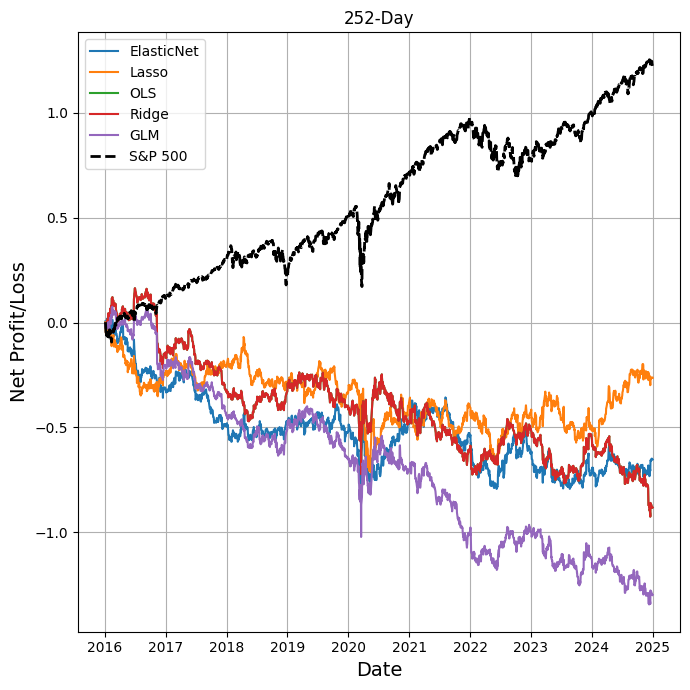

In [9]:
# Plotting returns of linear models vs S&P 500

plt.figure(figsize=(7,7))

# Portfolios
for col in ['ElasticNet', 'Lasso', 'OLS', 'Ridge', 'GLM']:
    plt.plot(portfolio_df.index, portfolio_df[col].cumsum(), label=col, linewidth=1.5)

# S&P 500 baseline
plt.plot(sp500.index, sp500['Cumulative Return'], label='S&P 500', color='black', linewidth=2, linestyle='dashed')
plt.title("252-Day")
plt.xlabel("Date", fontsize=14)
plt.ylabel("Net Profit/Loss", fontsize=14)
plt.legend(loc='upper left', fontsize='medium')
plt.grid(True)
plt.tight_layout()
plt.show()

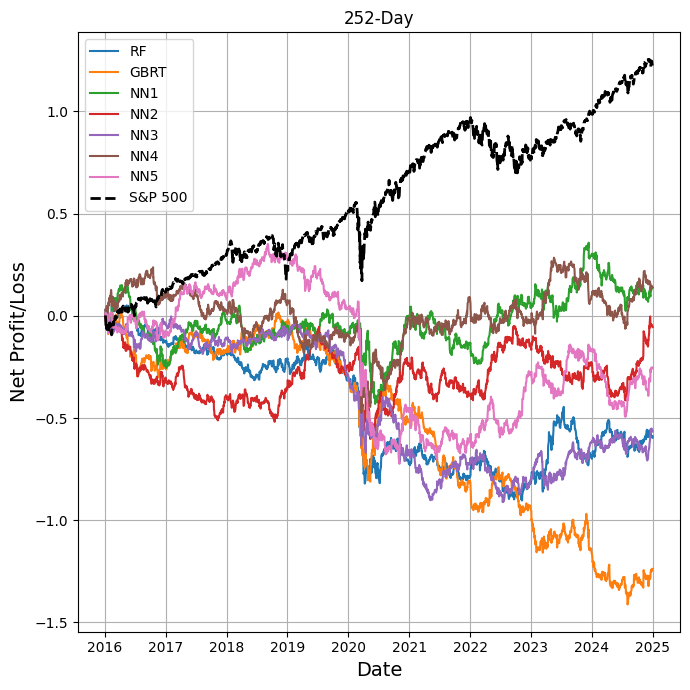

In [10]:
# Plotting returns of non-linear models vs S&P 500

plt.figure(figsize=(7,7))

# Portfolios
for col in ['RF', 'GBRT', 'NN1', 'NN2', 'NN3', 'NN4', 'NN5']:
    plt.plot(portfolio_df.index, portfolio_df[col].cumsum(), label=col, linewidth=1.5)

# S&P 500 baseline
plt.plot(sp500.index, sp500['Cumulative Return'], label='S&P 500', color='black', linewidth=2, linestyle='dashed')
plt.title("252-Day")
plt.xlabel("Date", fontsize=14)
plt.ylabel("Net Profit/Loss", fontsize=14)
plt.legend(loc='upper left', fontsize='medium')
plt.grid(True)
plt.tight_layout()
plt.show()

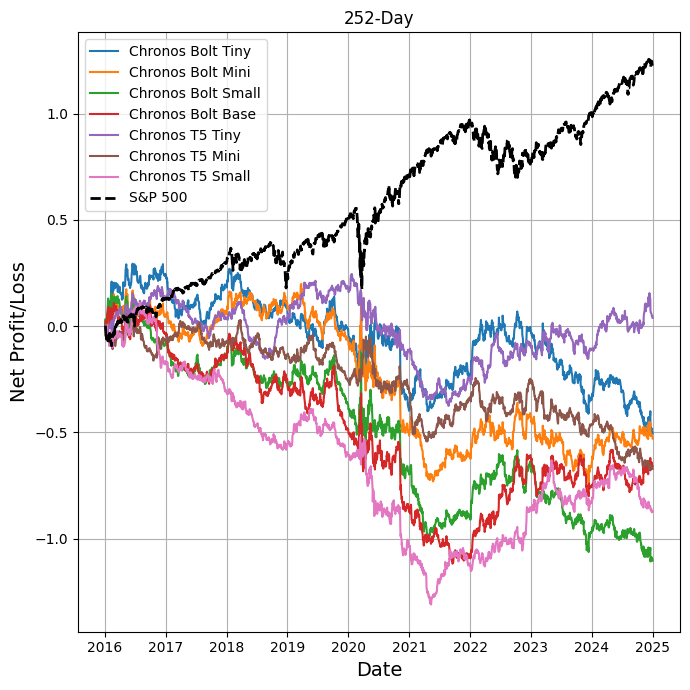

In [11]:
# Plotting returns of chronos models vs S&P 500

plt.figure(figsize=(7,7))
chronos_label = {'y_chr_bolt_tiny': 'Chronos Bolt Tiny', 
         'y_chr_bolt_mini': 'Chronos Bolt Mini', 
         'y_chr_bolt_small': 'Chronos Bolt Small', 
         'y_chr_bolt_base': 'Chronos Bolt Base',
         'y_chr_t5_tiny':'Chronos T5 Tiny', 
         'y_chr_t5_mini':'Chronos T5 Mini', 
         'y_chr_t5_small':'Chronos T5 Small'
         }

# Portfolios
for col in ['y_chr_bolt_tiny', 'y_chr_bolt_mini', 'y_chr_bolt_small', 'y_chr_bolt_base',
            'y_chr_t5_tiny', 'y_chr_t5_mini', 'y_chr_t5_small']:
    plt.plot(portfolio_df.index, portfolio_df[col].cumsum(), label=chronos_label[col], linewidth=1.5)

# S&P 500 baseline
plt.plot(sp500.index, sp500['Cumulative Return'], label='S&P 500', color='black', linewidth=2, linestyle='dashed')
plt.title("252-Day")
plt.xlabel("Date", fontsize=14)
plt.ylabel("Net Profit/Loss", fontsize=14)
plt.legend(loc='upper left', fontsize='medium')
plt.grid(True)
plt.tight_layout()
plt.show()


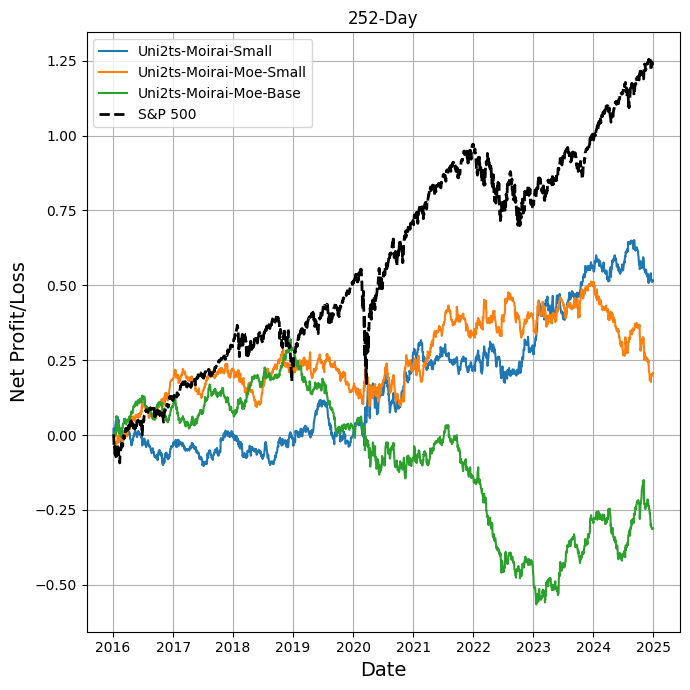

In [12]:
# Plotting returns of uni2ts models vs S&P 500

plt.figure(figsize=(7,7))
uni2ts_label = {"y_moirai_s": "Uni2ts-Moirai-Small",
               "y_moirai_moe_s": "Uni2ts-Moirai-Moe-Small",
               "y_moirai_moe_b": "Uni2ts-Moirai-Moe-Base"
         }

# Portfolios
for col in ['y_moirai_s', 'y_moirai_moe_s', 'y_moirai_moe_b',]:
    plt.plot(portfolio_df.index, portfolio_df[col].cumsum(), label=uni2ts_label[col], linewidth=1.5)

# S&P 500 baseline
plt.plot(sp500.index, sp500['Cumulative Return'], label='S&P 500', color='black', linewidth=2, linestyle='dashed')
plt.title("252-Day")
plt.xlabel("Date", fontsize=14)
plt.ylabel("Net Profit/Loss", fontsize=14)
plt.legend(loc='upper left', fontsize='medium')
plt.grid(True)
plt.tight_layout()
plt.show()


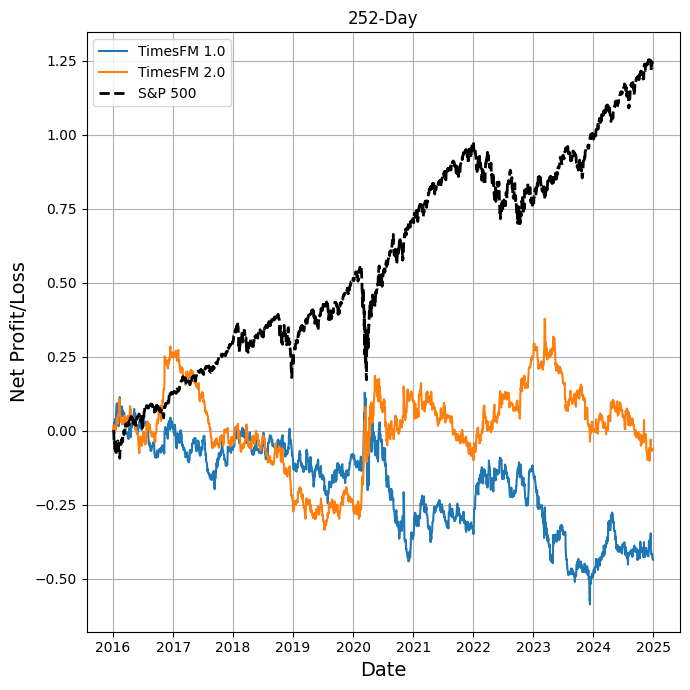

In [13]:
# Plotting returns of TimesFM models vs S&P 500

plt.figure(figsize=(7,7))

timesfm_label = {"y_tfm1": "TimesFM 1.0",
               "y_tfm2": "TimesFM 2.0"
               }

# Portfolios
for col in ['y_tfm1', 'y_tfm2']:
    plt.plot(portfolio_df.index, portfolio_df[col].cumsum(), label=timesfm_label[col], linewidth=1.5)

# S&P 500 baseline
plt.plot(sp500.index, sp500['Cumulative Return'], label='S&P 500', color='black', linewidth=2, linestyle='dashed')
plt.title("252-Day")
plt.xlabel("Date", fontsize=14)
plt.ylabel("Net Profit/Loss", fontsize=14)
plt.legend(loc='upper left', fontsize='medium')
plt.grid(True)
plt.tight_layout()
plt.show()

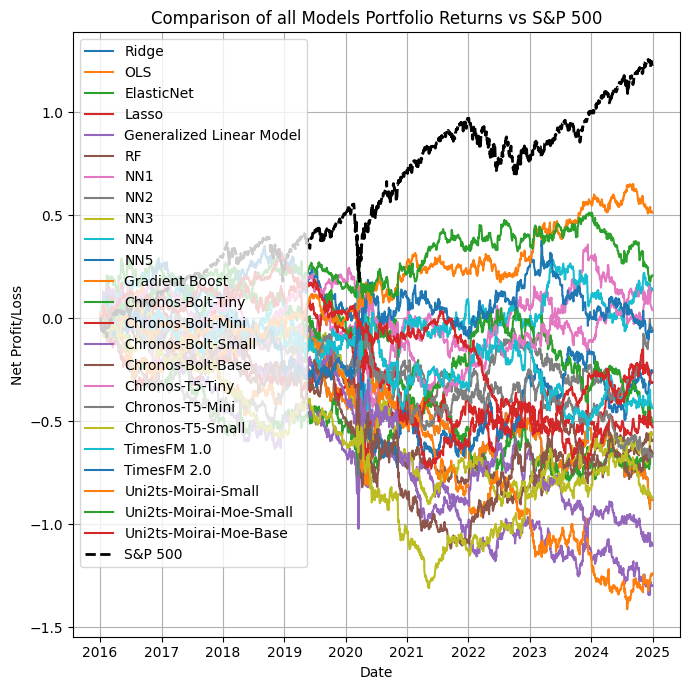

In [14]:
# Plotting returns of all models vs S&P 500

plt.figure(figsize=(7,7))

models_dict = {"OLS": "OLS",
               "Lasso": "Lasso",
               "Ridge": "Ridge",
               "ElasticNet": "ElasticNet",
               "RF": "RF",
               "GLM": "Generalized Linear Model",
               "GBRT": "Gradient Boost",
               "NN1": "NN1",
               "NN2": "NN2",
               "NN3": "NN3",
               "NN4": "NN4",
               "NN5": "NN5",
               "y_chr_bolt_tiny": "Chronos-Bolt-Tiny",
               "y_chr_bolt_mini": "Chronos-Bolt-Mini",
               "y_chr_bolt_small": "Chronos-Bolt-Small",
               "y_chr_bolt_base": "Chronos-Bolt-Base",
               "y_chr_t5_tiny": "Chronos-T5-Tiny",
               "y_chr_t5_mini": "Chronos-T5-Mini",
               "y_chr_t5_small": "Chronos-T5-Small",
               "y_tfm1": "TimesFM 1.0",
               "y_tfm2": "TimesFM 2.0",
               "y_moirai_s": "Uni2ts-Moirai-Small",
               "y_moirai_moe_s": "Uni2ts-Moirai-Moe-Small",
               "y_moirai_moe_b": "Uni2ts-Moirai-Moe-Base"
               }

# Portfolios
for col in model_cols:
    plt.plot(portfolio_df.index, portfolio_df[col].cumsum(), label=models_dict[col], linewidth=1.5)

# S&P 500 baseline
plt.plot(sp500.index, sp500['Cumulative Return'], label='S&P 500', color='black', linewidth=2, linestyle='dashed')
plt.title("Comparison of all Models Portfolio Returns vs S&P 500")
plt.xlabel("Date")
plt.ylabel("Net Profit/Loss")
plt.legend(loc='upper left', fontsize='medium')
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
def sharpe_ratio(df, column_name):
    returns = df[column_name]
    cumulative = (1 + returns).cumprod()
    mean_return = returns.mean()
    vol = returns.std()
    sharpe = mean_return / vol * np.sqrt(252)  # Daily Returns, annualized Sharpe Ratio
    return cumulative, sharpe

# Calculate Sharpe ratios for all models
sharpe_ratios = {}
for model in model_cols:
    cumulative, sharpe = sharpe_ratio(portfolio_df, model)
    sharpe_ratios[model] = sharpe

sharpe_ratios_df = pd.DataFrame.from_dict(sharpe_ratios, orient='index', columns=['Sharpe Ratio'])

sharpe_ratios_df

,Sharpe Ratio
Ridge,-0.426294
OLS,-0.426294
ElasticNet,-0.314182
Lasso,-0.117967
GLM,-0.621423
RF,-0.355894
NN1,0.072651
NN2,-0.031639
NN3,-0.335300
NN4,0.076852


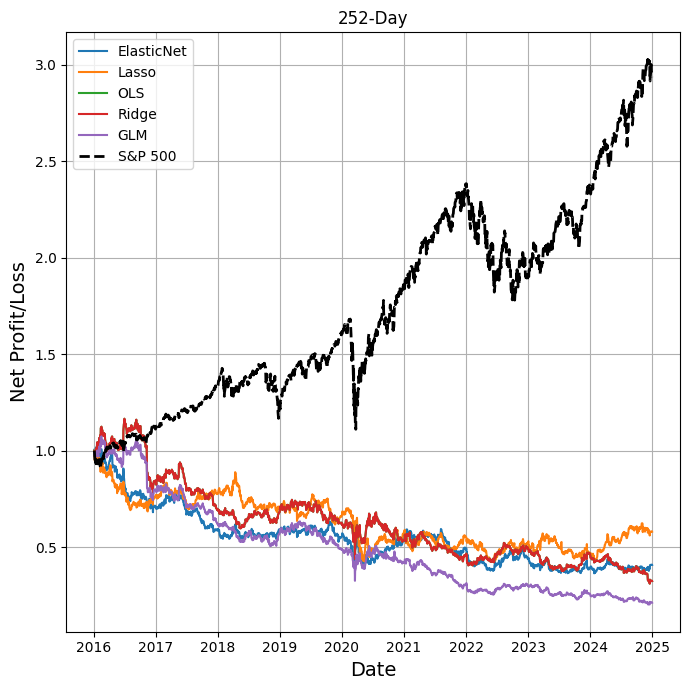

In [15]:
# Plotting compounded returns of linear models vs S&P 500

plt.figure(figsize=(7,7))

# Portfolios
for col in ['ElasticNet', 'Lasso', 'OLS', 'Ridge', 'GLM']:
    plt.plot(portfolio_df.index, (1+portfolio_df[col]).cumprod(), label=col, linewidth=1.5)

# S&P 500 baseline
plt.plot(sp500.index, sp500['Compounded Returns'], label='S&P 500', color='black', linewidth=2, linestyle='dashed')
plt.title("252-Day")
plt.xlabel("Date", fontsize=14)
plt.ylabel("Net Profit/Loss", fontsize=14)
plt.legend(loc='upper left', fontsize='medium')
plt.grid(True)
plt.tight_layout()
plt.show()

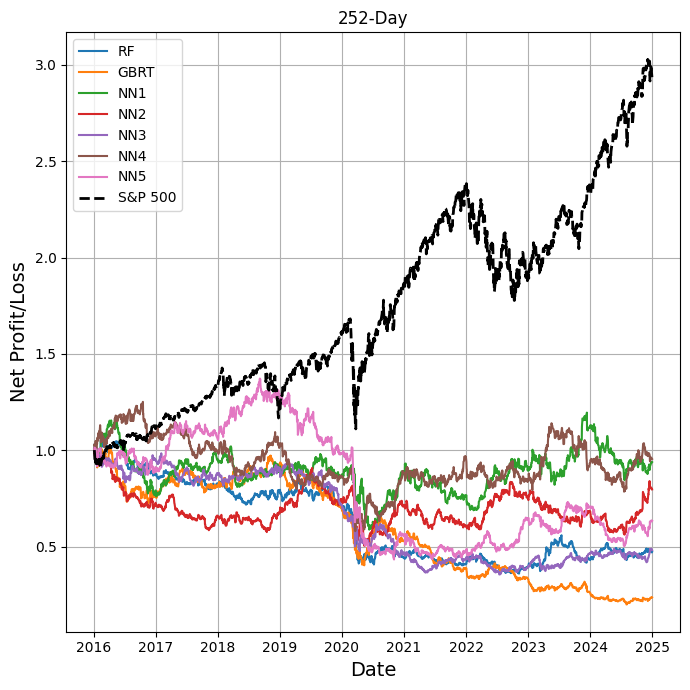

In [16]:
# Plotting returns of non-linear models vs S&P 500

plt.figure(figsize=(7,7))

# Portfolios
for col in ['RF', 'GBRT', 'NN1', 'NN2', 'NN3', 'NN4', 'NN5']:
    plt.plot(portfolio_df.index, (1+portfolio_df[col]).cumprod(), label=col, linewidth=1.5)

# S&P 500 baseline
plt.plot(sp500.index, sp500['Compounded Returns'], label='S&P 500', color='black', linewidth=2, linestyle='dashed')
plt.title("252-Day")
plt.xlabel("Date", fontsize=14)
plt.ylabel("Net Profit/Loss", fontsize=14)
plt.legend(loc='upper left', fontsize='medium')
plt.grid(True)
plt.tight_layout()
plt.show()

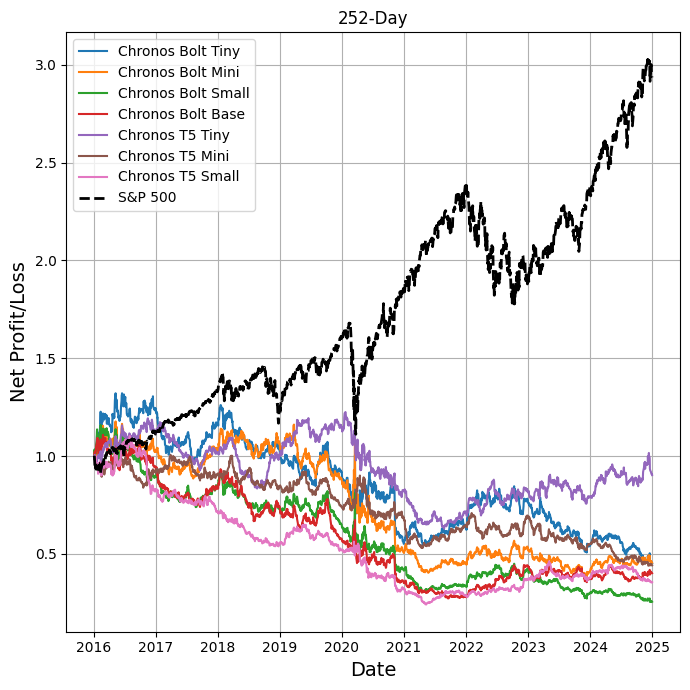

In [17]:
# Plotting returns of chronos models vs S&P 500

plt.figure(figsize=(7,7))
chronos_label = {'y_chr_bolt_tiny': 'Chronos Bolt Tiny', 
         'y_chr_bolt_mini': 'Chronos Bolt Mini', 
         'y_chr_bolt_small': 'Chronos Bolt Small', 
         'y_chr_bolt_base': 'Chronos Bolt Base',
         'y_chr_t5_tiny':'Chronos T5 Tiny', 
         'y_chr_t5_mini':'Chronos T5 Mini', 
         'y_chr_t5_small':'Chronos T5 Small'
         }

# Portfolios
for col in ['y_chr_bolt_tiny', 'y_chr_bolt_mini', 'y_chr_bolt_small', 'y_chr_bolt_base',
            'y_chr_t5_tiny', 'y_chr_t5_mini', 'y_chr_t5_small']:
    plt.plot(portfolio_df.index, (1+portfolio_df[col]).cumprod(), label=chronos_label[col], linewidth=1.5)

# S&P 500 baseline
plt.plot(sp500.index, sp500['Compounded Returns'], label='S&P 500', color='black', linewidth=2, linestyle='dashed')
plt.title("252-Day")
plt.xlabel("Date", fontsize=14)
plt.ylabel("Net Profit/Loss", fontsize=14)
plt.legend(loc='upper left', fontsize='medium')
plt.grid(True)
plt.tight_layout()
plt.show()


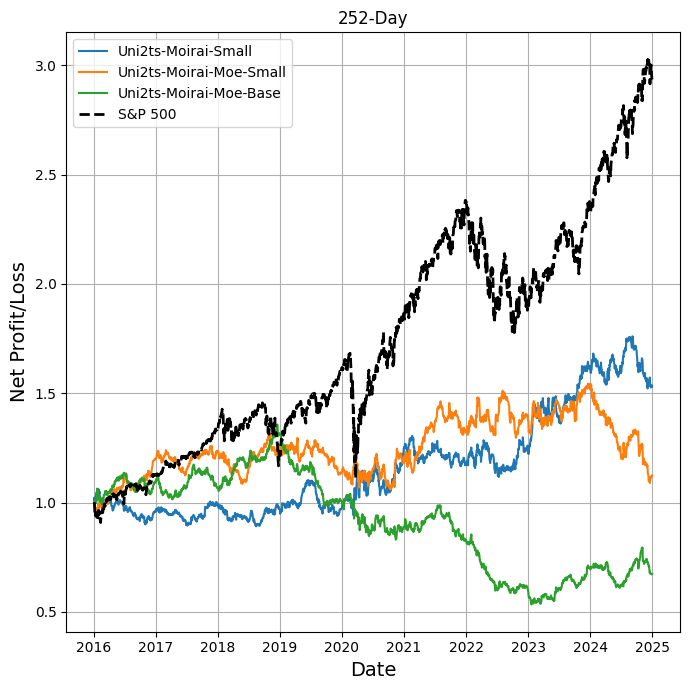

In [18]:
# Plotting returns of uni2ts models vs S&P 500

plt.figure(figsize=(7,7))
uni2ts_label = {"y_moirai_s": "Uni2ts-Moirai-Small",
               "y_moirai_moe_s": "Uni2ts-Moirai-Moe-Small",
               "y_moirai_moe_b": "Uni2ts-Moirai-Moe-Base"
         }

# Portfolios
for col in ['y_moirai_s', 'y_moirai_moe_s', 'y_moirai_moe_b',]:
    plt.plot(portfolio_df.index, (1+portfolio_df[col]).cumprod(), label=uni2ts_label[col], linewidth=1.5)

# S&P 500 baseline
plt.plot(sp500.index, sp500['Compounded Returns'], label='S&P 500', color='black', linewidth=2, linestyle='dashed')
plt.title("252-Day")
plt.xlabel("Date", fontsize=14)
plt.ylabel("Net Profit/Loss", fontsize=14)
plt.legend(loc='upper left', fontsize='medium')
plt.grid(True)
plt.tight_layout()
plt.show()


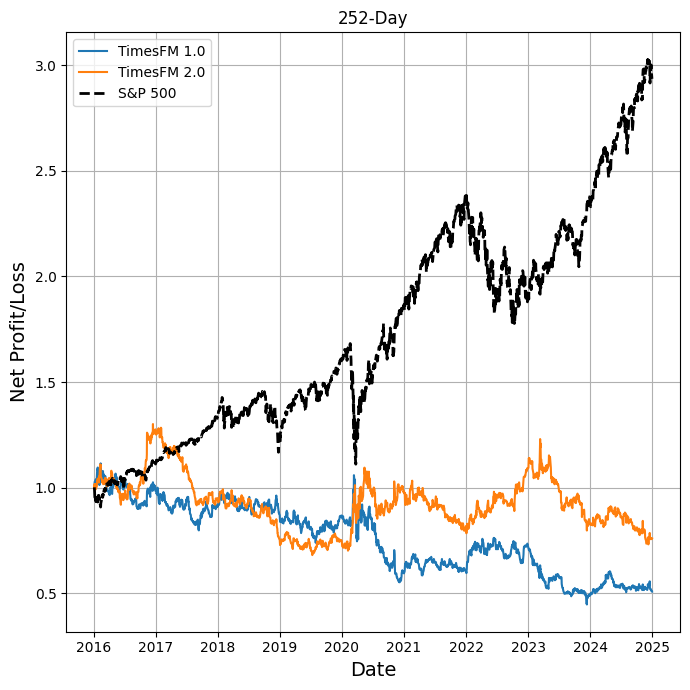

In [19]:
# Plotting returns of TimesFM models vs S&P 500

plt.figure(figsize=(7,7))

timesfm_label = {"y_tfm1": "TimesFM 1.0",
               "y_tfm2": "TimesFM 2.0"
               }

# Portfolios
for col in ['y_tfm1', 'y_tfm2']:
    plt.plot(portfolio_df.index, (1+portfolio_df[col]).cumprod(), label=timesfm_label[col], linewidth=1.5)

# S&P 500 baseline
plt.plot(sp500.index, sp500['Compounded Returns'], label='S&P 500', color='black', linewidth=2, linestyle='dashed')
plt.title("252-Day")
plt.xlabel("Date", fontsize=14)
plt.ylabel("Net Profit/Loss", fontsize=14)
plt.legend(loc='upper left', fontsize='medium')
plt.grid(True)
plt.tight_layout()
plt.show()

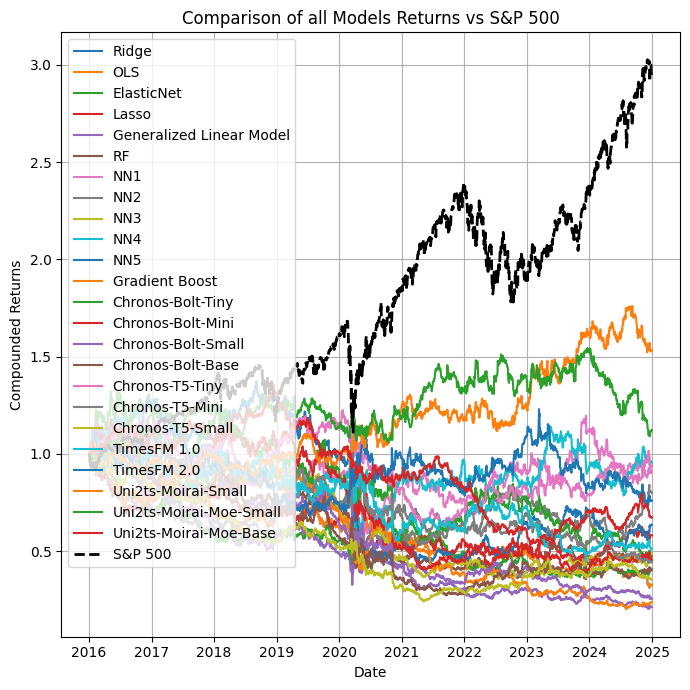

In [21]:
# Plotting returns of all models vs S&P 500

plt.figure(figsize=(7,7))

models_dict = {"OLS": "OLS",
               "Lasso": "Lasso",
               "Ridge": "Ridge",
               "ElasticNet": "ElasticNet",
               "RF": "RF",
               "GLM": "Generalized Linear Model",
               "GBRT": "Gradient Boost",
               "NN1": "NN1",
               "NN2": "NN2",
               "NN3": "NN3",
               "NN4": "NN4",
               "NN5": "NN5",
               "y_chr_bolt_tiny": "Chronos-Bolt-Tiny",
               "y_chr_bolt_mini": "Chronos-Bolt-Mini",
               "y_chr_bolt_small": "Chronos-Bolt-Small",
               "y_chr_bolt_base": "Chronos-Bolt-Base",
               "y_chr_t5_tiny": "Chronos-T5-Tiny",
               "y_chr_t5_mini": "Chronos-T5-Mini",
               "y_chr_t5_small": "Chronos-T5-Small",
               "y_tfm1": "TimesFM 1.0",
               "y_tfm2": "TimesFM 2.0",
               "y_moirai_s": "Uni2ts-Moirai-Small",
               "y_moirai_moe_s": "Uni2ts-Moirai-Moe-Small",
               "y_moirai_moe_b": "Uni2ts-Moirai-Moe-Base"
               }

# Portfolios
for col in model_cols:
    plt.plot(portfolio_df.index, (1+portfolio_df[col]).cumprod(), label=models_dict[col], linewidth=1.5)

# S&P 500 baseline
plt.plot(sp500.index, sp500['Compounded Returns'], label='S&P 500', color='black', linewidth=2, linestyle='dashed')
plt.title("Comparison of all Models Returns vs S&P 500")
plt.xlabel("Date")
plt.ylabel("Compounded Returns")
plt.legend(loc='upper left', fontsize='medium')
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
# Function to calculate performance metrics

def performance_metrics(df, column_name):
    returns = df[column_name]

    avg_daily_return = returns.mean()
    ann_return = avg_daily_return * 252
    daily_vol = returns.std()
    ann_vol = daily_vol * np.sqrt(252)
    sharpe = avg_daily_return / daily_vol * np.sqrt(252)

    return {
        'Avg Daily Return': avg_daily_return,
        'Annualized Return': ann_return,
        'Daily Volatility': daily_vol,
        'Annualized Volatility': ann_vol,
        'Sharpe Ratio': sharpe    
        }


In [21]:
metrics_dict = {}

for model in model_cols:
    metrics = performance_metrics(portfolio_df, model)
    metrics_dict[model] = {k: v for k, v in metrics.items()}

# Create summary DataFrame
metrics_df = pd.DataFrame.from_dict(metrics_dict, orient='index')

metrics_df

,Avg Daily Return,Annualized Return,Daily Volatility,Annualized Volatility,Sharpe Ratio
Ridge,-0.000392,-0.098833,0.014605,0.231841,-0.426294
OLS,-0.000392,-0.098833,0.014605,0.231841,-0.426294
ElasticNet,-0.000290,-0.073205,0.014678,0.233003,-0.314182
Lasso,-0.000117,-0.029522,0.015765,0.250256,-0.117967
GLM,-0.000577,-0.145529,0.014752,0.234188,-0.621423
RF,-0.000262,-0.066124,0.011704,0.185798,-0.355894
NN1,0.000061,0.015362,0.013320,0.211443,0.072651
NN2,-0.000024,-0.006173,0.012291,0.195120,-0.031639
NN3,-0.000252,-0.063489,0.011928,0.189349,-0.335300
NN4,0.000062,0.015641,0.012820,0.203516,0.076852


In [ ]:
def calculate_daily_weights(df, model_col, n=10):
    weights_dict = {}
    for date, group in df.groupby('Date'):
        sorted_group = group.sort_values(model_col, ascending=False)
        no_of_stocks = round((n / 100) * len(sorted_group))
        weights = pd.Series(0, index=sorted_group['PERMNO'])
        weights.loc[sorted_group.head(no_of_stocks)['PERMNO']] = 1 / no_of_stocks
        weights.loc[sorted_group.tail(no_of_stocks)['PERMNO']] = -1 / no_of_stocks
        weights_dict[date] = weights
    weights_df = pd.DataFrame(weights_dict).T.fillna(0)
    return weights_df

def calculate_daily_turnover(weights_df):
    turnover_list = []
    prev_weights = None
    for date, weights in weights_df.iterrows():
        if prev_weights is None:
            turnover = 0
        else:
            turnover = ((weights - prev_weights).abs().sum()) / 2
        turnover_list.append((date, turnover))
        prev_weights = weights
    turnover_df = pd.DataFrame(turnover_list, columns=['Date', 'Turnover']).set_index('Date')
    return turnover_df

def adjust_returns_with_costs(returns_df, turnover_df, transaction_cost_per_trade=0.0015):
    df = returns_df.copy()
    df = df.join(turnover_df, how='left')
    df['Transaction_Cost'] = transaction_cost_per_trade * df['Turnover']
    df['Returns_Adj'] = df['Returns'] - df['Transaction_Cost']
    return df

def performance_metrics(df, return_col='Returns_Adj'):
    returns = df[return_col].dropna()
    avg_daily_return = returns.mean()
    annualized_return = avg_daily_return * 252
    daily_volatility = returns.std()
    annualized_volatility = daily_volatility * np.sqrt(252)
    sharpe_ratio = annualized_return / annualized_volatility if annualized_volatility != 0 else np.nan
    metrics = {
        'Avg Daily Return': avg_daily_return,
        'Annualized Return': annualized_return,
        'Daily Volatility': daily_volatility,
        'Annualized Volatility': annualized_volatility,
        'Sharpe Ratio': sharpe_ratio
    }
    return metrics

# Your list of model columns
model_cols = ['Ridge', 'OLS', 'ElasticNet', 'Lasso', 'GLM', 'RF', 'NN1', 'NN2', 'NN3', 'NN4', 'NN5', 'GBRT', 
              'y_chr_bolt_tiny', 'y_chr_bolt_mini', 'y_chr_bolt_small', 'y_chr_bolt_base',
              'y_chr_t5_tiny', 'y_chr_t5_mini', 'y_chr_t5_small',
              'y_tfm1', 'y_tfm2',
              'y_moirai_s', 'y_moirai_moe_s', 'y_moirai_moe_b']

transaction_cost_per_trade = 0.0002 # 2 bps
n = 10  # top/bottom 10% stocks for long-short

all_metrics = {}
returns_adj_dfs = pd.DataFrame()

for model in model_cols:
    print(f"Processing model: {model}")
    returns_df = build_long_short_portfolio(combined_df, model, n=n)
    returns_df.set_index('Date', inplace=True)
    weights_df = calculate_daily_weights(combined_df, model, n=n)
    turnover_df = calculate_daily_turnover(weights_df)
    returns_adj_df = adjust_returns_with_costs(returns_df, turnover_df, transaction_cost_per_trade)
    metrics = performance_metrics(returns_adj_df, return_col='Returns_Adj')
    all_metrics[model] = metrics
    returns_adj_dfs[model] = returns_adj_df['Returns_Adj']


# Convert dict of dicts to DataFrame for easier viewing
metrics_df_adj = pd.DataFrame.from_dict(all_metrics, orient='index')
metrics_df_adj = metrics_df_adj.sort_values(by='Sharpe Ratio', ascending=False)

print(metrics_df_adj)


In [32]:
metrics_df_adj

,Avg Daily Return,Annualized Return,Daily Volatility,Annualized Volatility,Sharpe Ratio
y_moirai_s,-0.000124,-0.031331,0.008875,0.140880,-0.222394
NN1,-0.000273,-0.068673,0.013320,0.211446,-0.324777
y_chr_t5_tiny,-0.000231,-0.058158,0.011189,0.177627,-0.327418
NN4,-0.000287,-0.072326,0.012820,0.203516,-0.355384
y_tfm2,-0.000318,-0.080202,0.013726,0.217900,-0.368066
y_tfm1,-0.000389,-0.097942,0.014561,0.231144,-0.423728
y_chr_bolt_tiny,-0.000435,-0.109603,0.015832,0.251328,-0.436095
y_moirai_moe_s,-0.000259,-0.065293,0.009017,0.143143,-0.456136
y_chr_bolt_mini,-0.000438,-0.110451,0.015048,0.238879,-0.462371
Lasso,-0.000464,-0.116879,0.015768,0.250307,-0.466941


In [33]:
# Rename columns to corresponding models

returns_adj_dfs

,Ridge,OLS,ElasticNet,Lasso,GLM,RF,NN1,NN2,NN3,NN4,...,y_chr_bolt_small,y_chr_bolt_base,y_chr_t5_tiny,y_chr_t5_mini,y_chr_t5_small,y_tfm1,y_tfm2,y_moirai_s,y_moirai_moe_s,y_moirai_moe_b
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,-0.011127,-0.011127,0.005350,0.001220,-0.013620,0.005096,-0.000289,-0.010173,0.007031,-0.005510,...,0.009588,0.001189,-0.001006,-0.002370,-0.004911,0.003862,0.003687,0.005153,-0.004784,-0.000202
2016-01-05,0.006154,0.006154,-0.009581,-0.006982,0.005685,0.007172,0.003160,0.014649,-0.002424,0.025544,...,0.011663,0.013478,0.002468,-0.004310,-0.003551,0.002761,0.012499,0.016633,0.003854,-0.000103
2016-01-06,-0.006593,-0.006593,0.003425,-0.013691,-0.011307,0.002107,0.004478,-0.000746,0.006735,0.011312,...,0.011841,0.002859,-0.006125,-0.012562,-0.004711,0.011939,-0.000399,0.000894,0.005101,0.002370
2016-01-07,-0.010823,-0.010823,-0.026809,-0.027259,-0.008211,0.019050,-0.006858,-0.028992,-0.008232,-0.007157,...,-0.001930,0.004628,-0.002168,0.010364,0.007260,0.009089,-0.016134,-0.021073,-0.024154,-0.000855
2016-01-08,-0.008217,-0.008217,-0.005632,-0.007212,-0.003841,-0.008569,-0.006476,-0.005535,-0.003978,0.003368,...,-0.012662,-0.001771,0.011683,0.000261,-0.001452,-0.000202,0.008619,-0.008430,-0.007965,-0.007468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,-0.013862,-0.013862,-0.000889,0.003751,-0.013888,-0.001489,0.006354,0.005748,0.002482,0.002654,...,0.012299,0.012398,-0.002242,0.010877,-0.010518,0.003500,0.003012,-0.002404,0.006415,-0.001246
2024-12-26,0.001093,0.001093,0.004090,-0.000400,-0.000527,-0.003804,0.007147,-0.005466,-0.000221,-0.001102,...,-0.008767,-0.010193,-0.007679,-0.005819,-0.006594,-0.007628,-0.006572,0.000123,-0.001649,-0.001997
2024-12-27,0.000808,0.000808,-0.002226,-0.003090,0.000668,-0.000370,-0.004776,-0.001182,-0.006176,-0.002676,...,0.003325,-0.003577,-0.004356,0.000599,0.003742,-0.006924,0.002262,-0.000643,0.000371,-0.001121


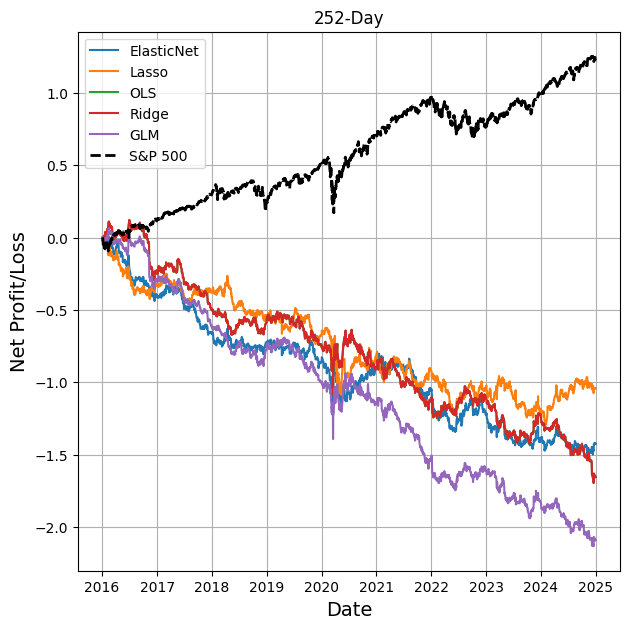

In [34]:
# Plotting returns of linear models vs S&P 500

plt.figure(figsize=(7,7))

# Portfolios
for col in ['ElasticNet', 'Lasso', 'OLS', 'Ridge', 'GLM']:
    plt.plot(returns_adj_dfs.index, returns_adj_dfs[col].cumsum(), label=col, linewidth=1.5)

# S&P 500 baseline
plt.plot(sp500.index, sp500['Cumulative Return'], label='S&P 500', color='black', linewidth=2, linestyle='dashed')
plt.title("252-Day")
plt.xlabel("Date", fontsize=14)
plt.ylabel("Net Profit/Loss", fontsize=14)
plt.legend(loc='upper left', fontsize='medium')
plt.grid(True)
#plt.tight_layout()
plt.show()

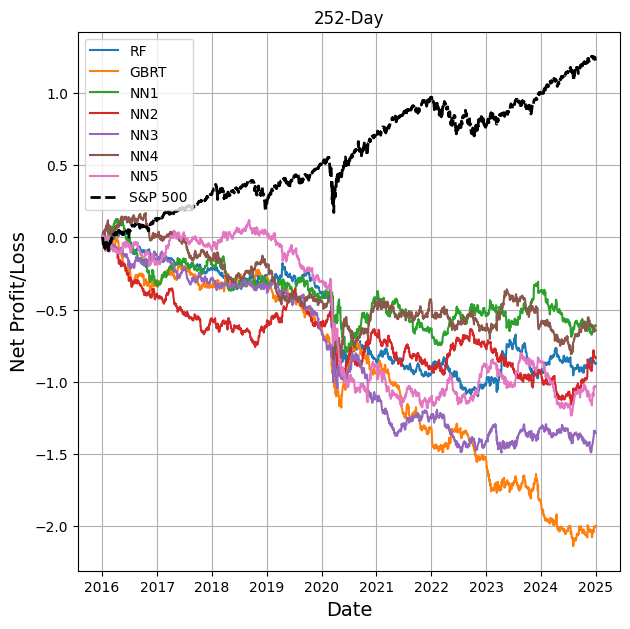

In [38]:
# Plotting returns of non-linear models vs S&P 500

plt.figure(figsize=(7,7))

# Portfolios
for col in ['RF', 'GBRT', 'NN1', 'NN2', 'NN3', 'NN4', 'NN5']:
    plt.plot(returns_adj_dfs.index, returns_adj_dfs[col].cumsum(), label=col, linewidth=1.5)

# S&P 500 baseline
plt.plot(sp500.index, sp500['Cumulative Return'], label='S&P 500', color='black', linewidth=2, linestyle='dashed')
plt.title("252-Day")
plt.xlabel("Date", fontsize=14)
plt.ylabel("Net Profit/Loss", fontsize=14)
plt.legend(loc='upper left', fontsize='medium')
plt.grid(True)
#plt.tight_layout()
plt.show()

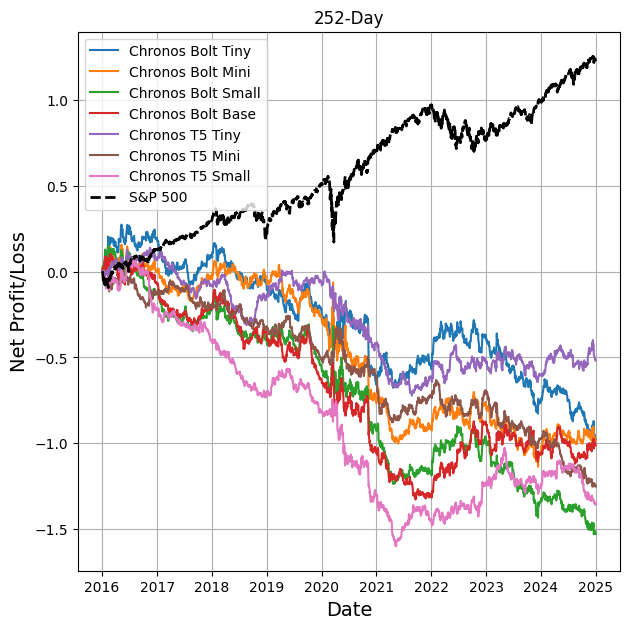

In [36]:
# Plotting returns of chronos models vs S&P 500

plt.figure(figsize=(7,7))
chronos_label = {'y_chr_bolt_tiny': 'Chronos Bolt Tiny', 
         'y_chr_bolt_mini': 'Chronos Bolt Mini', 
         'y_chr_bolt_small': 'Chronos Bolt Small', 
         'y_chr_bolt_base': 'Chronos Bolt Base',
         'y_chr_t5_tiny':'Chronos T5 Tiny', 
         'y_chr_t5_mini':'Chronos T5 Mini', 
         'y_chr_t5_small':'Chronos T5 Small'
         }

# Portfolios
for col in ['y_chr_bolt_tiny', 'y_chr_bolt_mini', 'y_chr_bolt_small', 'y_chr_bolt_base',
            'y_chr_t5_tiny', 'y_chr_t5_mini', 'y_chr_t5_small']:
    plt.plot(returns_adj_dfs.index, returns_adj_dfs[col].cumsum(), label=chronos_label[col], linewidth=1.5)

# S&P 500 baseline
plt.plot(sp500.index, sp500['Cumulative Return'], label='S&P 500', color='black', linewidth=2, linestyle='dashed')
plt.title("252-Day")
plt.xlabel("Date", fontsize=14)
plt.ylabel("Net Profit/Loss", fontsize=14)
plt.legend(loc='upper left', fontsize='medium')
plt.grid(True)
#plt.tight_layout()
plt.show()

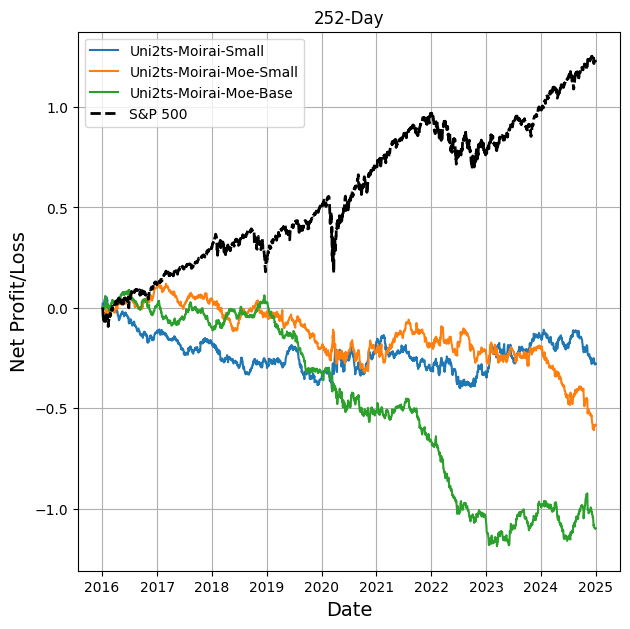

In [37]:
# Plotting returns of uni2ts models vs S&P 500

plt.figure(figsize=(7,7))
uni2ts_label = {"y_moirai_s": "Uni2ts-Moirai-Small",
               "y_moirai_moe_s": "Uni2ts-Moirai-Moe-Small",
               "y_moirai_moe_b": "Uni2ts-Moirai-Moe-Base"
         }

# Portfolios
for col in ['y_moirai_s', 'y_moirai_moe_s', 'y_moirai_moe_b',]:
    plt.plot(returns_adj_dfs.index, returns_adj_dfs[col].cumsum(), label=uni2ts_label[col], linewidth=1.5)

# S&P 500 baseline
plt.plot(sp500.index, sp500['Cumulative Return'], label='S&P 500', color='black', linewidth=2, linestyle='dashed')
plt.title("Uni2ts-Moirais Models Portfolio Returns")
plt.title("252-Day")
plt.xlabel("Date", fontsize=14)
plt.ylabel("Net Profit/Loss", fontsize=14)
plt.legend(loc='upper left', fontsize='medium')
plt.grid(True)
#plt.tight_layout()
plt.show()


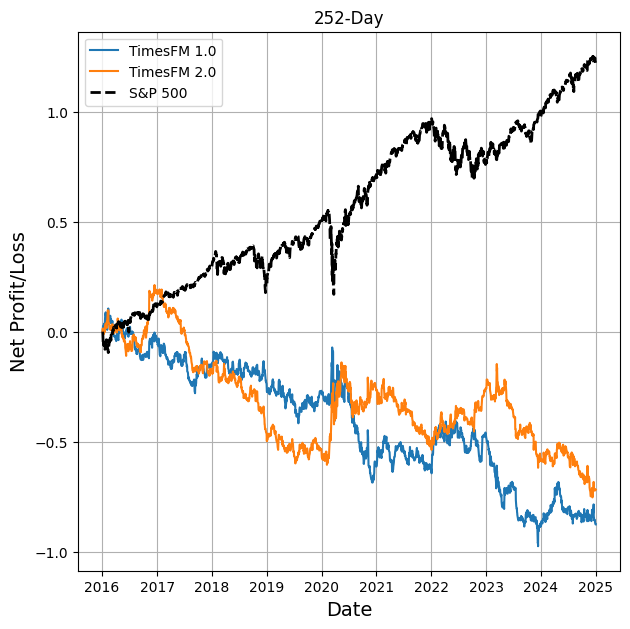

In [39]:
# Plotting returns of uni2ts models vs S&P 500

plt.figure(figsize=(7,7))
timesfm_label = {"y_tfm1": "TimesFM 1.0",
               "y_tfm2": "TimesFM 2.0"
               }

# Portfolios
for col in ['y_tfm1', 'y_tfm2']:
    plt.plot(returns_adj_dfs.index, returns_adj_dfs[col].cumsum(), label=timesfm_label[col], linewidth=1.5)

# S&P 500 baseline
plt.plot(sp500.index, sp500['Cumulative Return'], label='S&P 500', color='black', linewidth=2, linestyle='dashed')
plt.title("Uni2ts-Moirais Models Portfolio Returns")
plt.title("252-Day")
plt.xlabel("Date", fontsize=14)
plt.ylabel("Net Profit/Loss", fontsize=14)
plt.legend(loc='upper left', fontsize='medium')
plt.grid(True)
#plt.tight_layout()
plt.show()